In [182]:
# !pip install -U --pre pycaret

## Imports

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.classify_method import data_cleaning_suggestions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pycaret.classification import *

## Data

In [184]:
df = pd.read_csv('data/mushroom.csv')

In [185]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [186]:
df.describe().T

,count,unique,top,freq
cap-shape,8124,6,b'x',3656
cap-surface,8124,4,b'y',3244
cap-color,8124,10,b'n',2284
bruises%3F,8124,2,b'f',4748
odor,8124,9,b'n',3528
gill-attachment,8124,2,b'f',7914
gill-spacing,8124,2,b'c',6812
gill-size,8124,2,b'b',5612
gill-color,8124,12,b'b',1728
stalk-shape,8124,2,b't',4608


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

### renaming the target

In [188]:
df.rename({'class' : 'poisonous'}, axis = 1, inplace = True)

# Visualization
---

## Poisonous frequency

([<matplotlib.patches.Wedge at 0x19d2889dfd0>,
 [Text(-0.062071904545809166, 1.0982472757380535, 'no poisonous'),
  Text(0.06376477466978539, -1.1281994741672732, 'poisonous')],
 [Text(-0.03385740247953227, 0.5990439685843927, '51.797%'),
  Text(0.03555027260350867, -0.6289961670136124, '48.203%')])

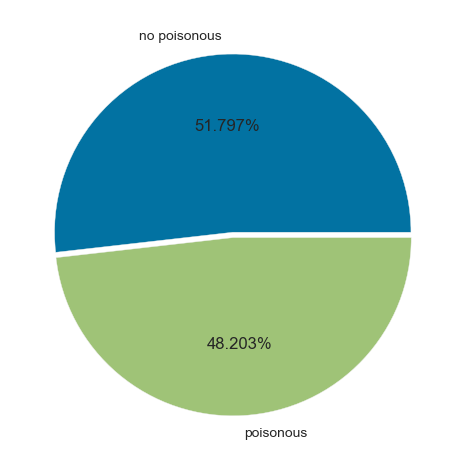

In [189]:
qtd_casado = df['poisonous'].value_counts()
plt.pie(qtd_casado, labels = ['no poisonous', 'poisonous'], autopct = '%.3f%%', explode = [0,0.03])

## Comparing "poisonous" to everything else

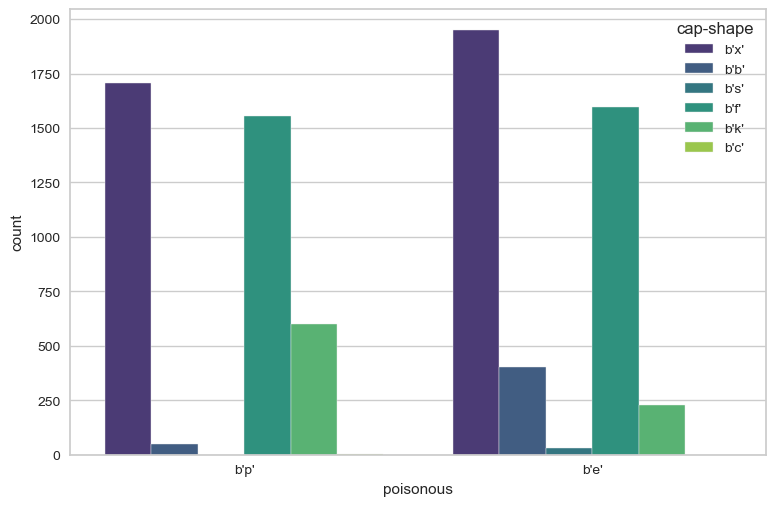

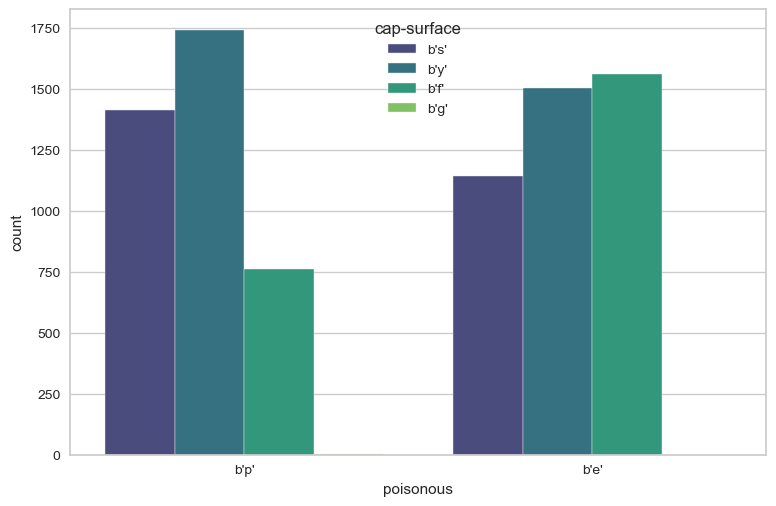

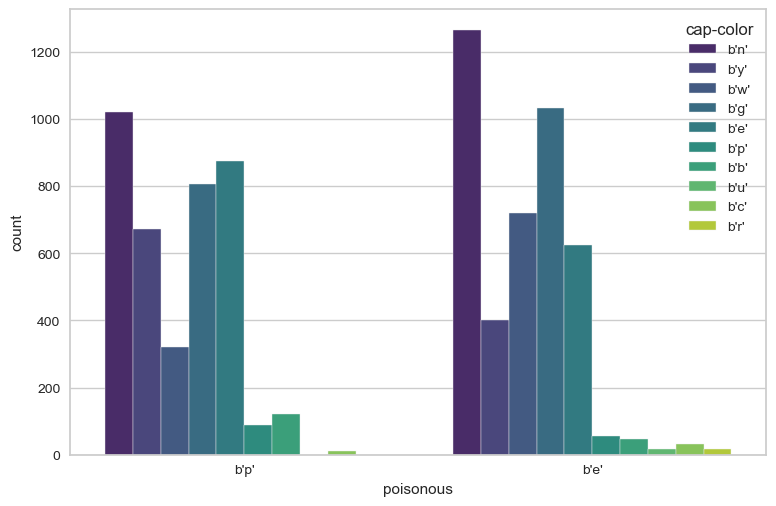

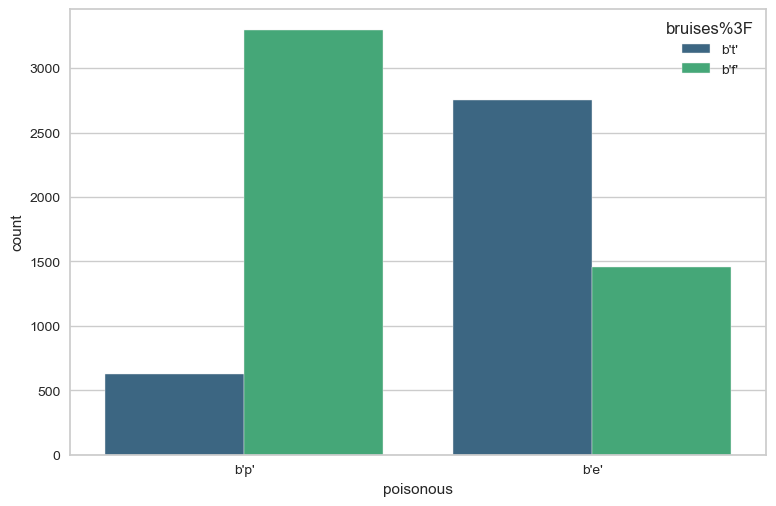

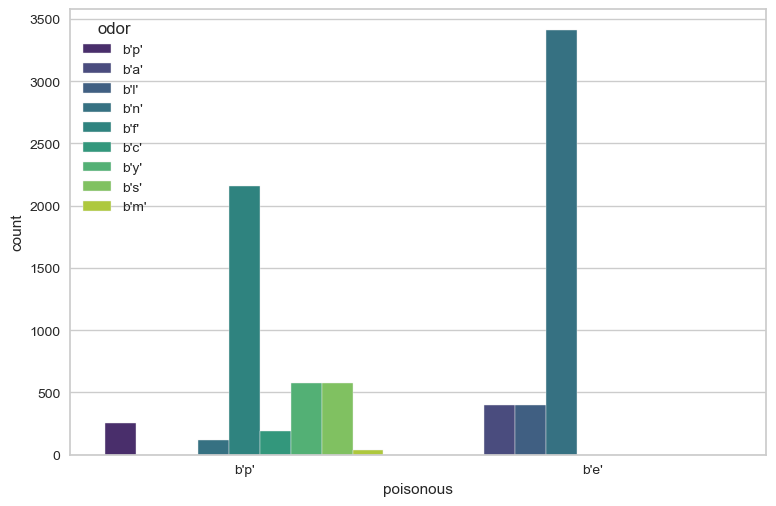

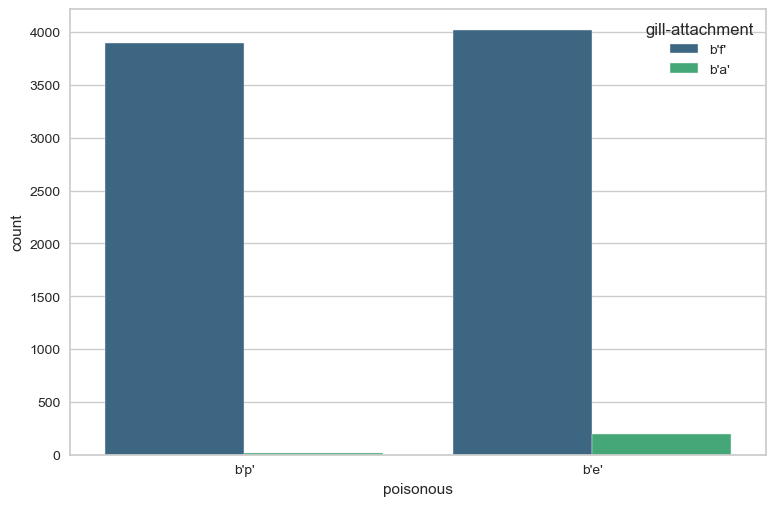

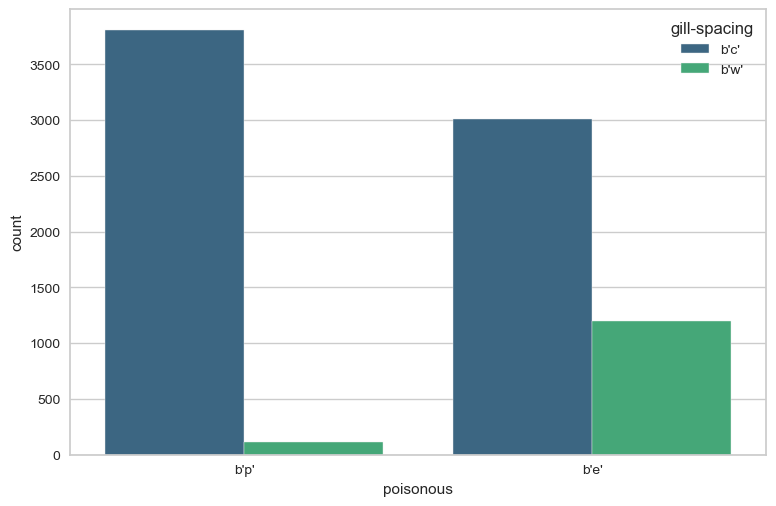

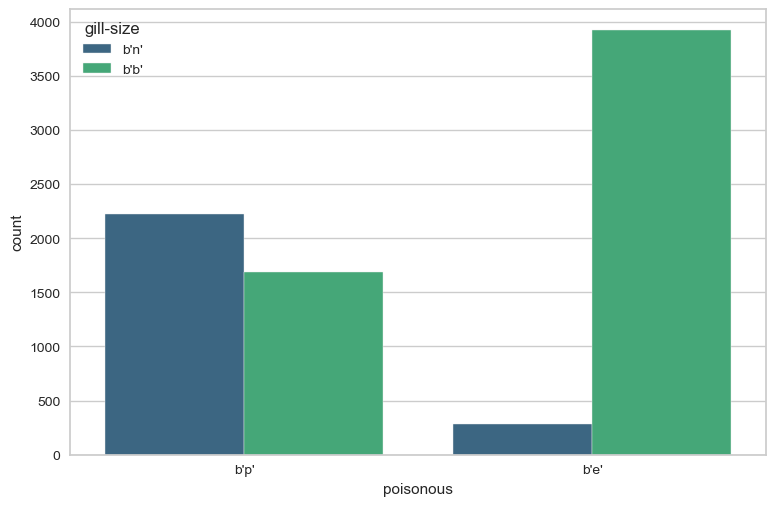

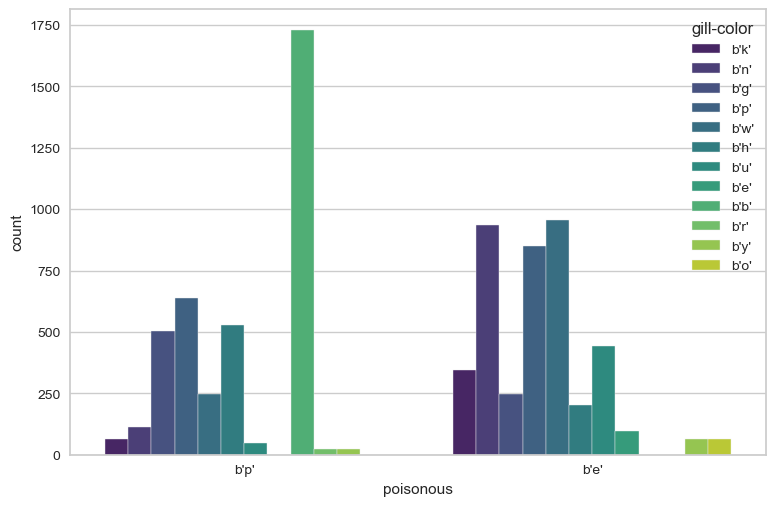

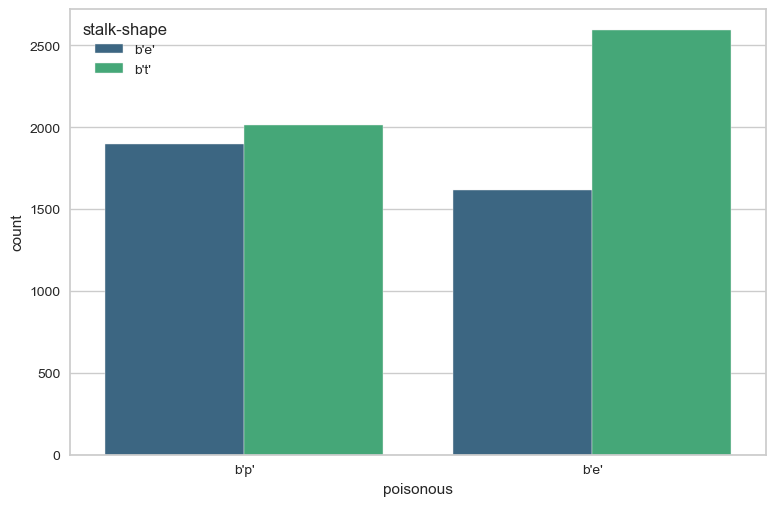

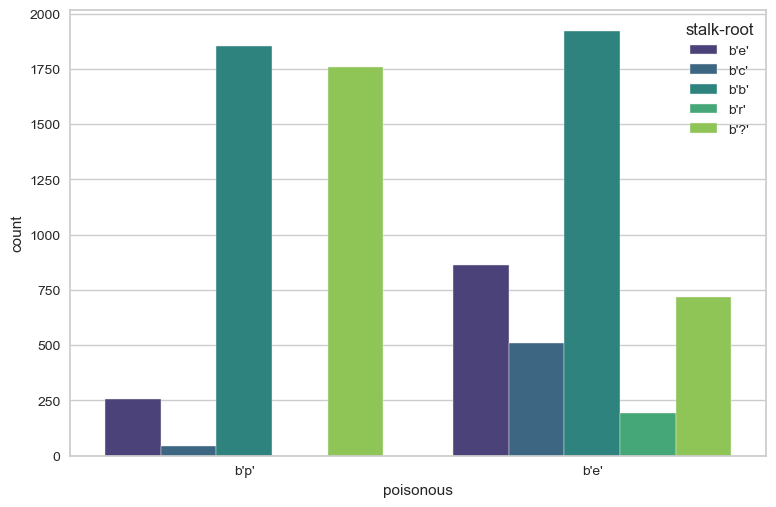

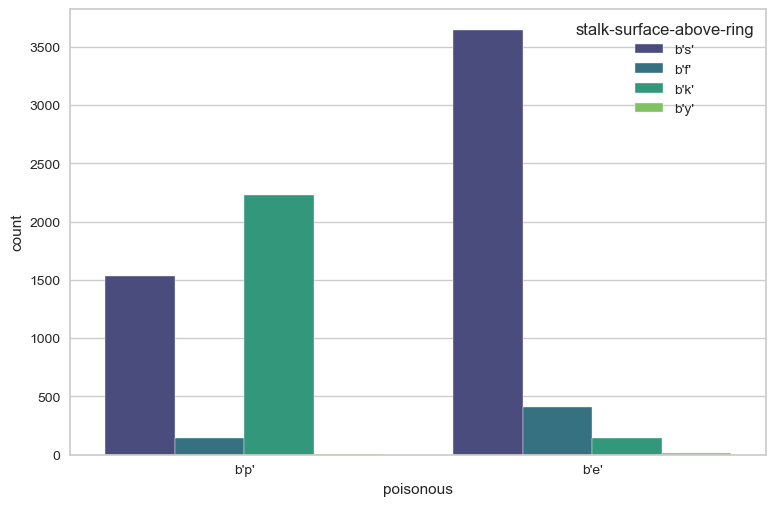

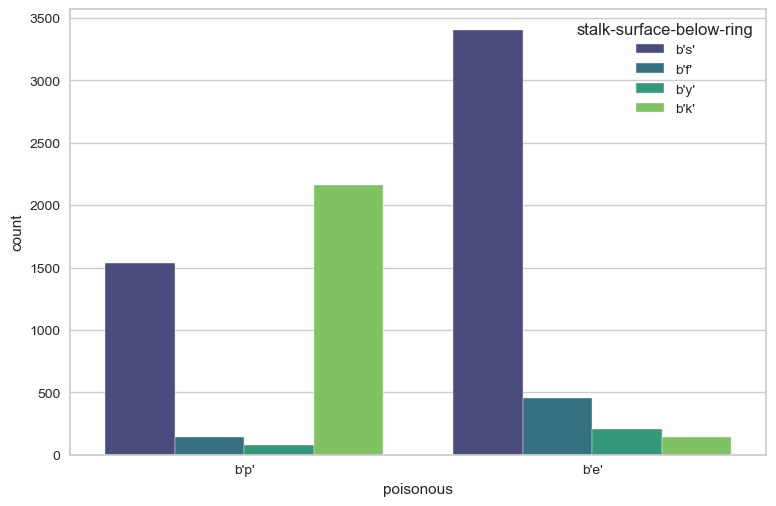

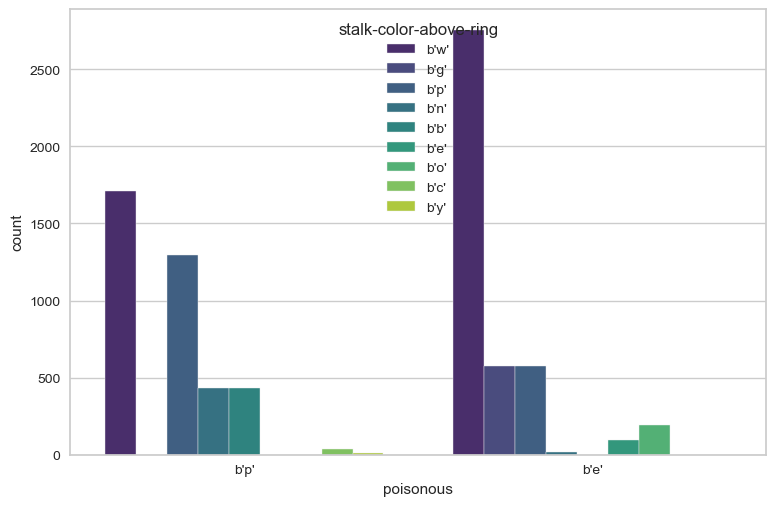

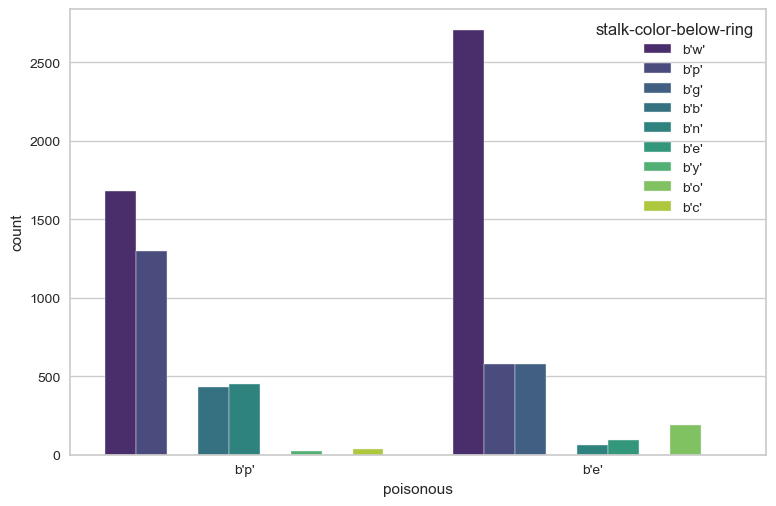

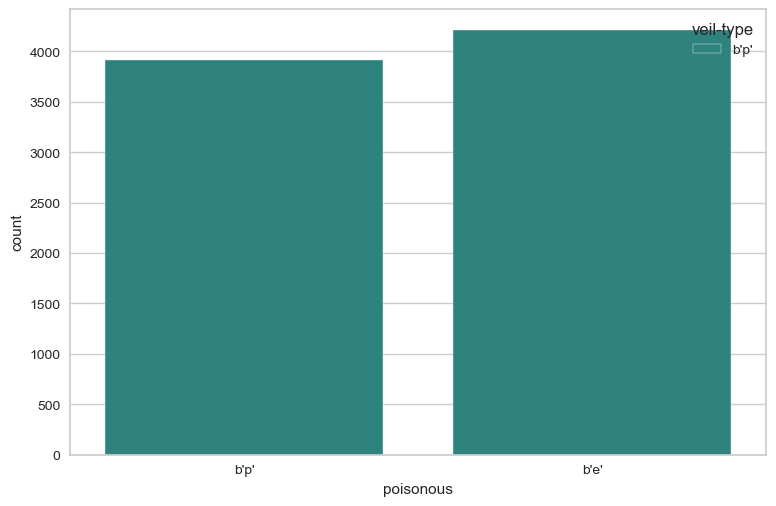

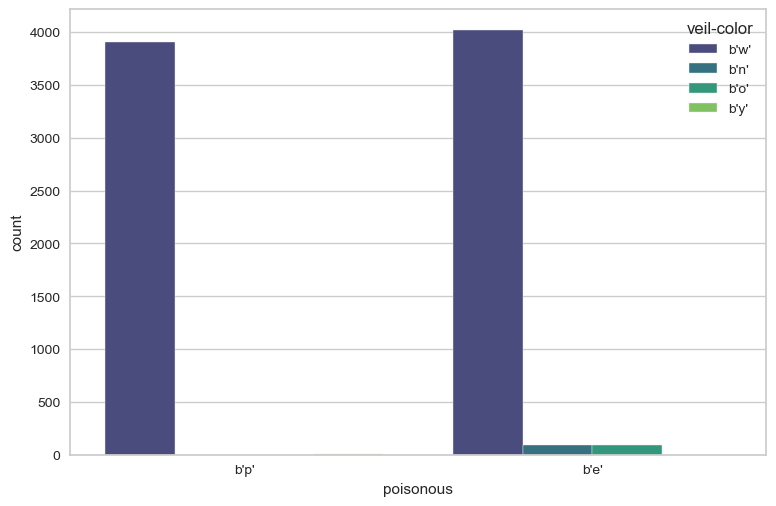

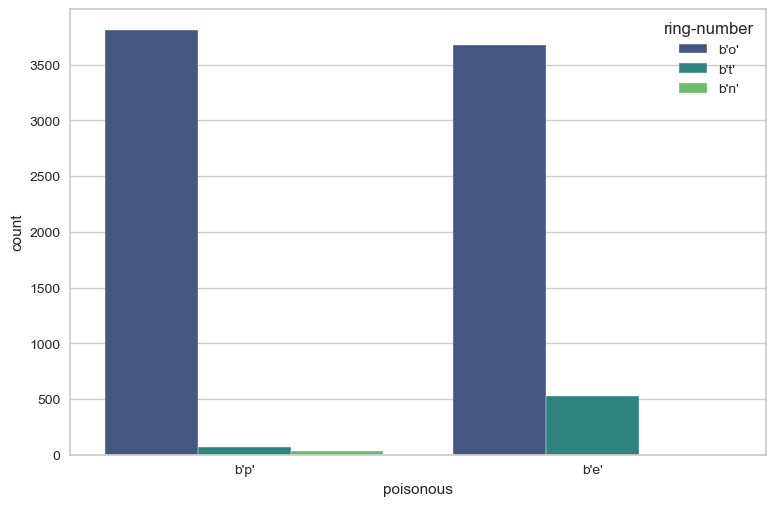

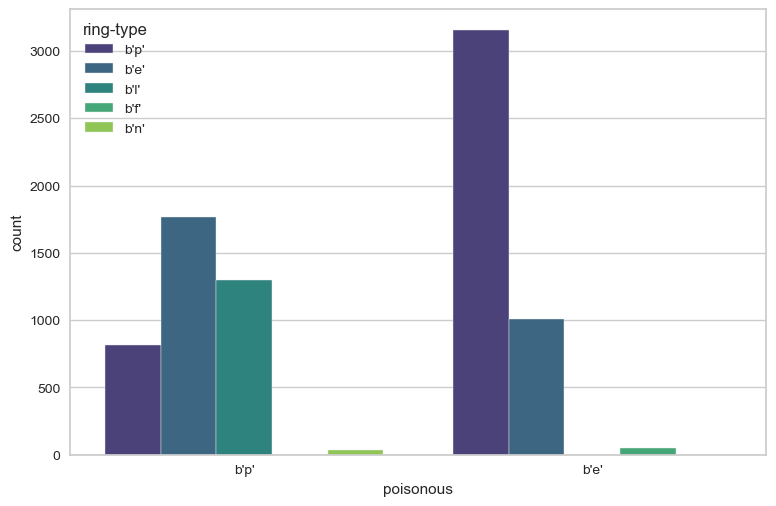

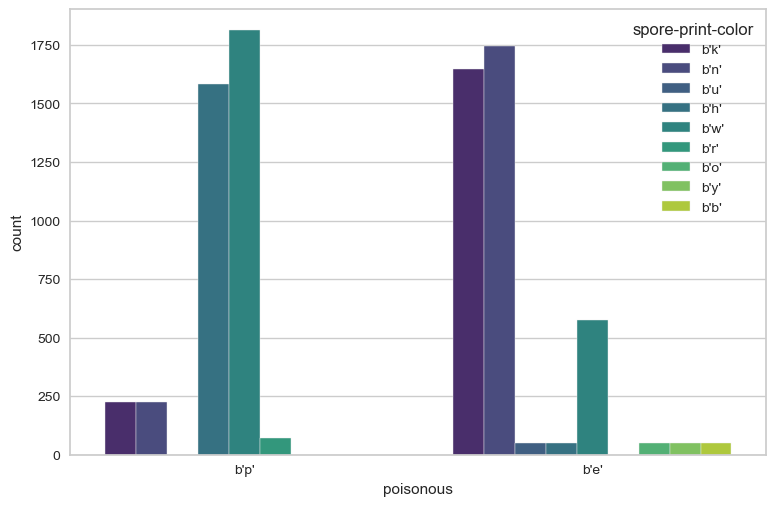

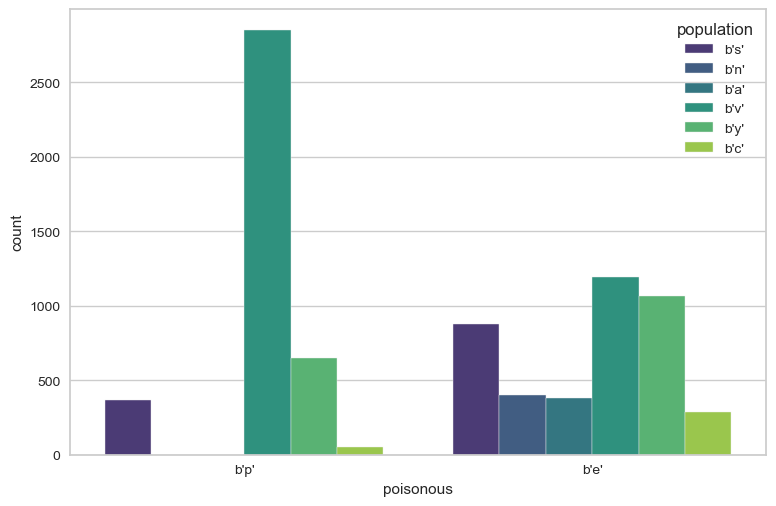

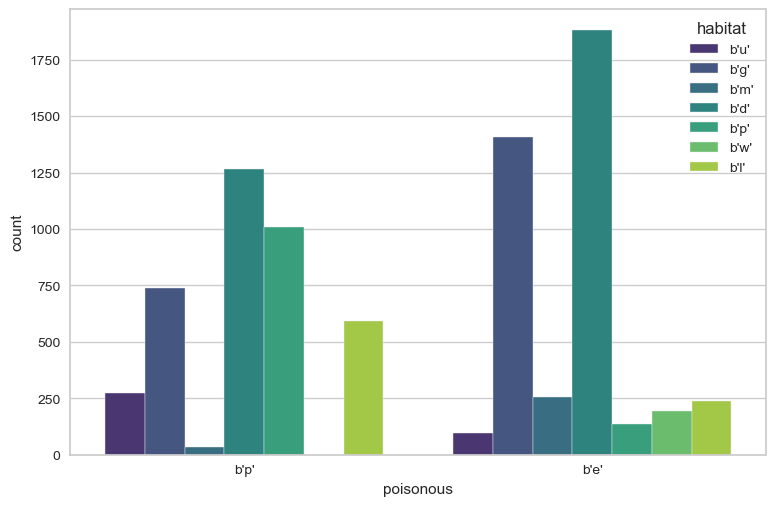

In [190]:
for g in df.drop('poisonous', axis = 1).columns:
    sns.countplot(data = df, x = "poisonous", hue = g, palette = "viridis")
    plt.show()

## Histogram of all df

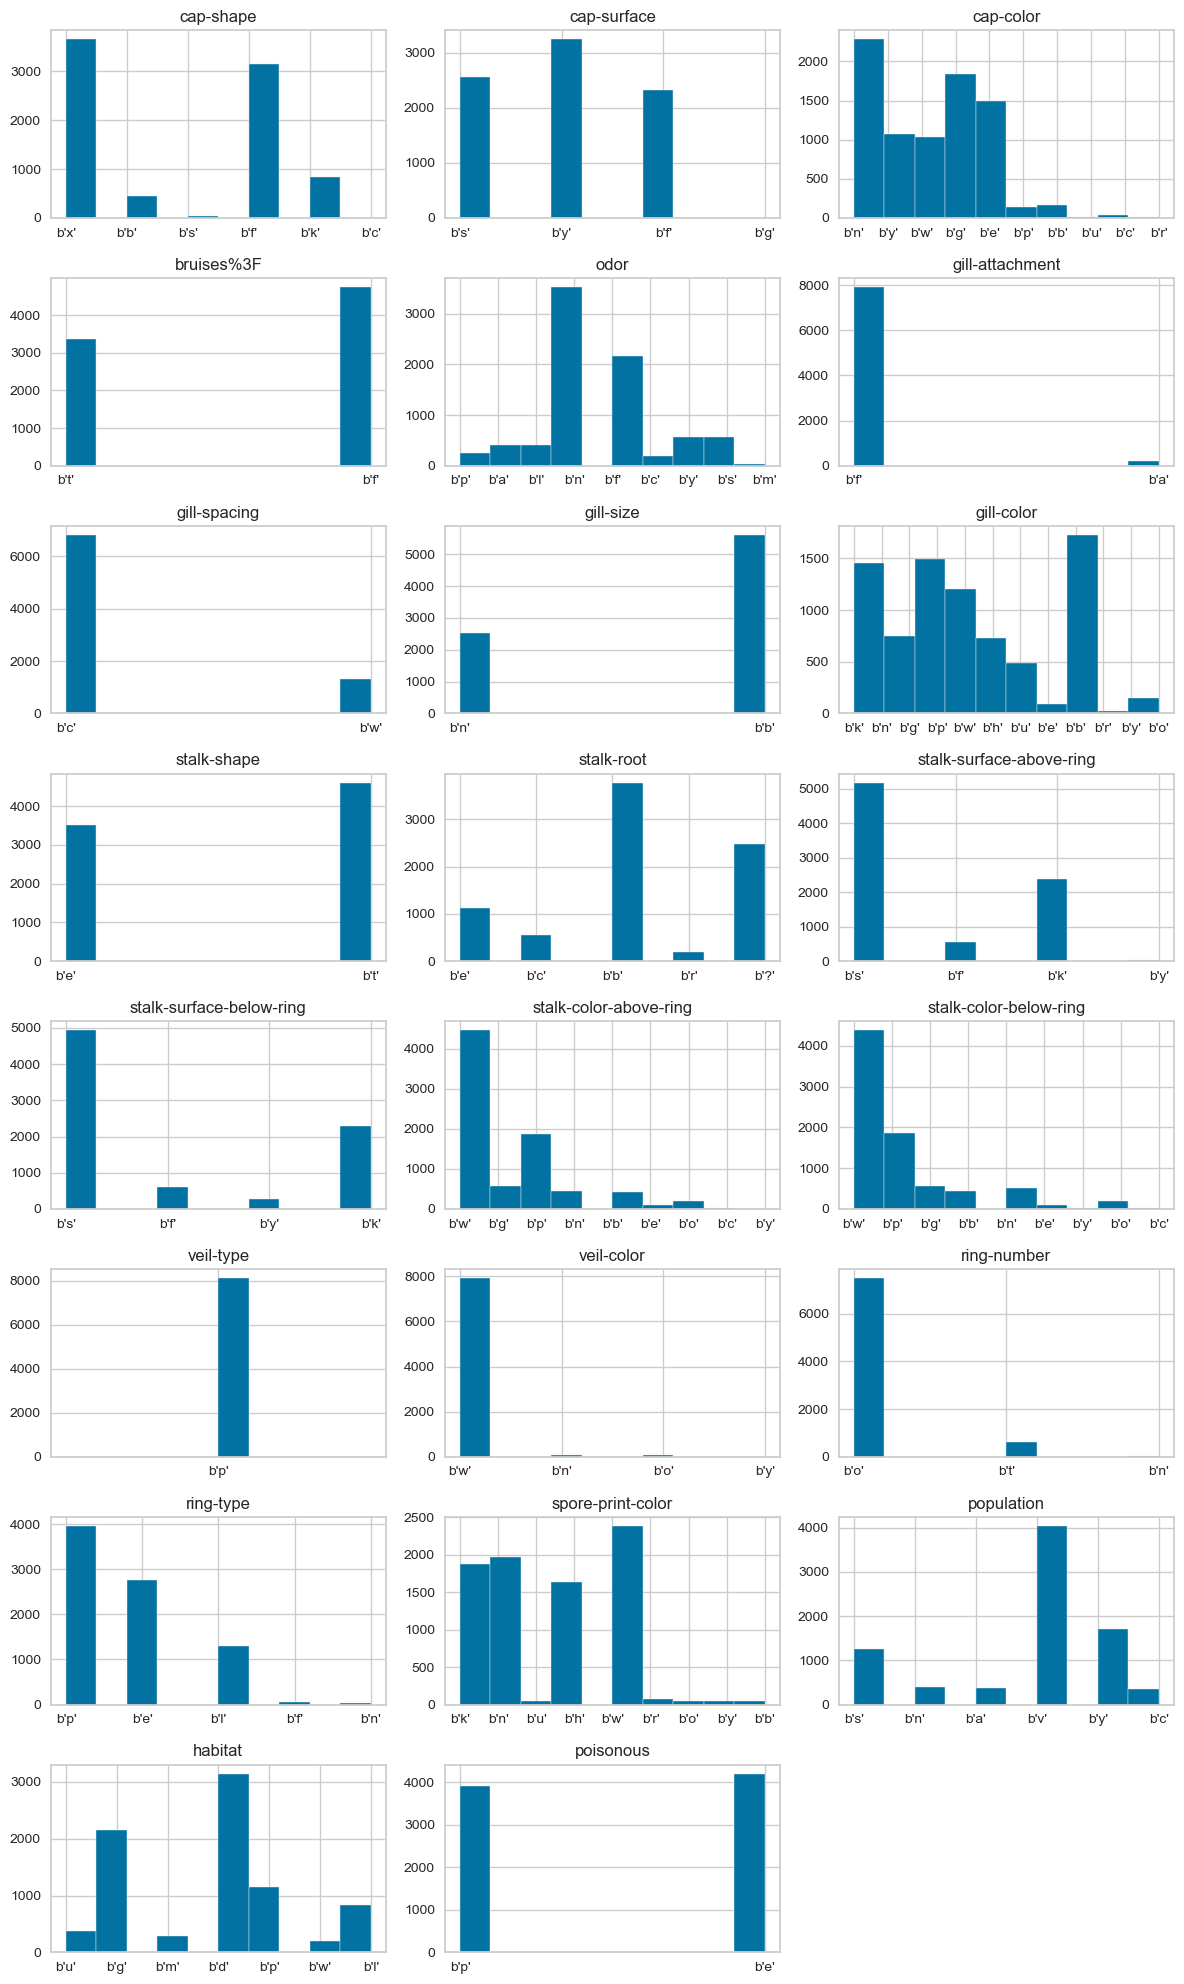

In [191]:
lista_colunas = list(df.columns)
plt.figure(figsize = (12, 20))

for i in range(len(lista_colunas)):
    plt.subplot(8, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.hist(df[lista_colunas[i]])
    
plt.tight_layout()

In [192]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
gill-color,12,object,0,0.000000,0.147710,24,
cap-color,10,object,0,0.000000,0.123092,16,
stalk-color-above-ring,9,object,0,0.000000,0.110783,8,
odor,9,object,0,0.000000,0.110783,36,
spore-print-color,9,object,0,0.000000,0.110783,48,
stalk-color-below-ring,9,object,0,0.000000,0.110783,24,
habitat,7,object,0,0.000000,0.086164,192,
cap-shape,6,object,0,0.000000,0.073855,4,
population,6,object,0,0.000000,0.073855,340,
ring-type,5,object,0,0.000000,0.061546,36,


## Data processing

In [193]:
# getting object columns
cat_cols = df.select_dtypes(include = ['object']).columns

# encode values
le = LabelEncoder()
for col in cat_cols: 
    le.fit(df[col])
    df[col] = le.transform(df[col])

## Correlation

<AxesSubplot:>

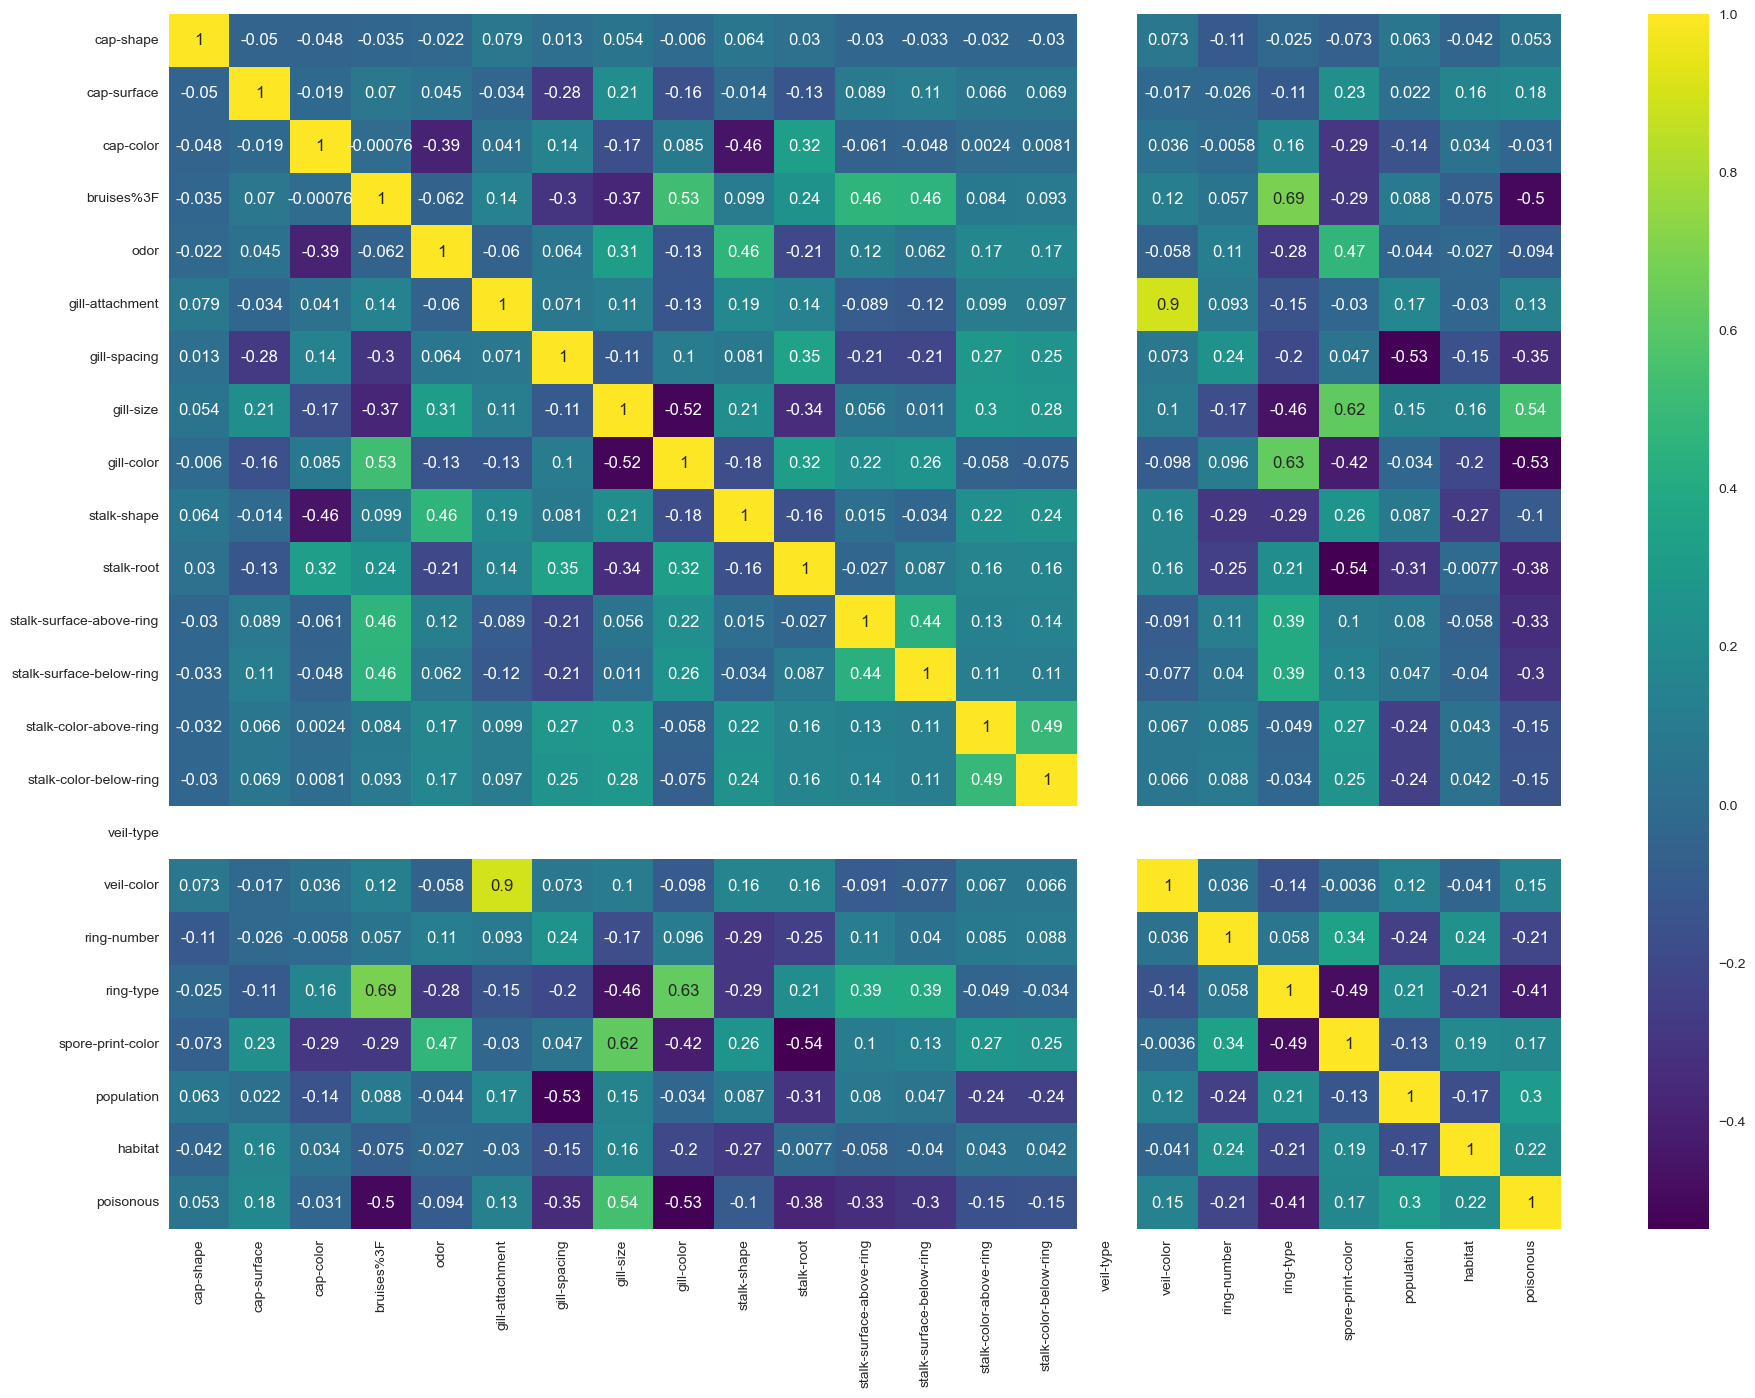

In [194]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [195]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


## Split train/test

In [196]:
X = df.drop('poisonous', axis = 1)
y = df['poisonous']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Using pycaret to compare the models

In [197]:
train_dados = pd.concat([xtrain, ytrain], axis = 1)

s = setup(data = train_dados, target = 'poisonous', session_id = 0, normalize = True)

,Description,Value
0,Session id,0
1,Target,poisonous
2,Target type,Binary
3,Original data shape,"(6499, 23)"
4,Transformed data shape,"(6499, 23)"
5,Transformed train set shape,"(4549, 23)"
6,Transformed test set shape,"(1950, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


## Comparing models

In [198]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5270
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4590
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4880
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4830
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4740
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5450
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5060
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5890
svm,SVM - Linear Kernel,0.9782,0.0000,0.9850,0.9709,0.9777,0.9565,0.9569,0.4530
lr,Logistic Regression,0.9558,0.9886,0.9490,0.9591,0.9539,0.9115,0.9116,0.9500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## Creating the model

In [199]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predictions

In [200]:
preds = predict_model(dt)
preds

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous,prediction_label,prediction_score
7464,3,3,4,0,7,1,0,1,0,1,...,0,2,1,0,7,4,0,1,1,1.0
7357,3,2,2,0,2,1,0,1,0,1,...,0,2,1,0,7,4,2,1,1,1.0
5893,3,3,4,1,5,1,0,0,1,0,...,0,2,2,0,7,1,6,0,0,1.0
5213,5,2,3,1,2,1,0,0,7,1,...,0,2,1,4,1,4,5,1,1,1.0
1614,2,2,4,1,6,1,0,1,7,0,...,0,2,1,4,3,4,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,5,3,9,0,2,1,0,0,2,0,...,0,2,1,2,1,5,0,1,1,1.0
4237,2,0,9,0,2,1,0,0,3,0,...,0,2,1,2,1,4,0,1,1,1.0
4832,2,0,9,0,2,1,0,0,7,0,...,0,2,1,2,1,4,4,1,1,1.0
6693,2,3,4,0,7,1,0,1,0,1,...,0,2,1,0,7,4,4,1,1,1.0


## Plots

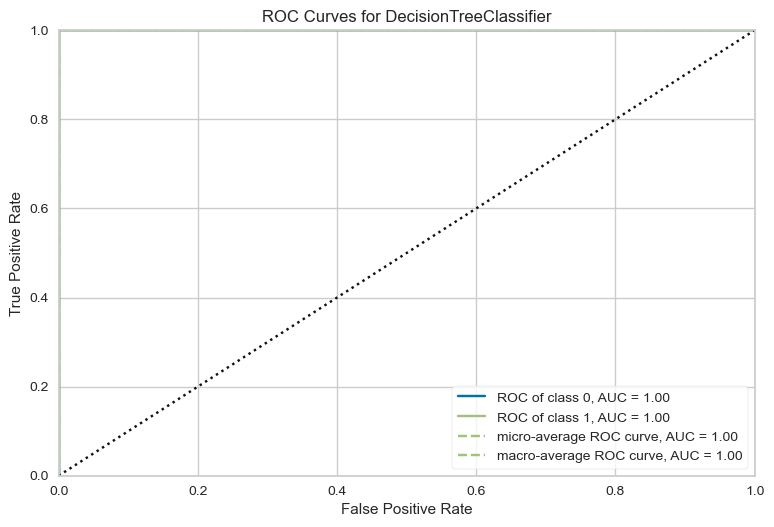

In [201]:
plot_model(dt)

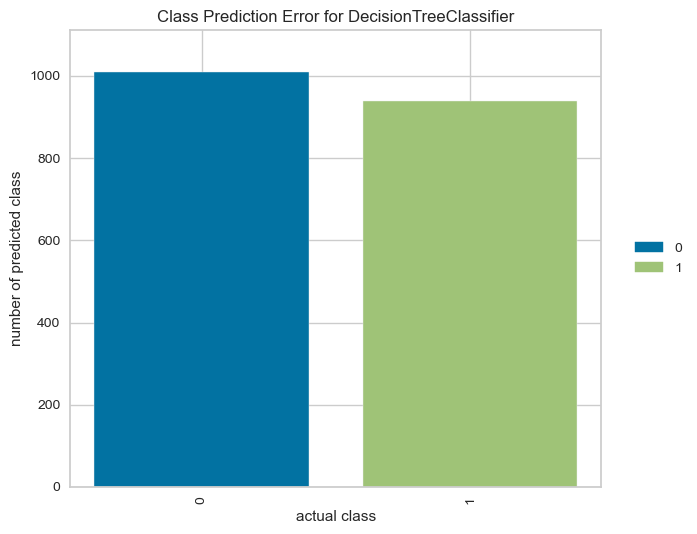

In [202]:
plot_model(dt, plot = 'error')

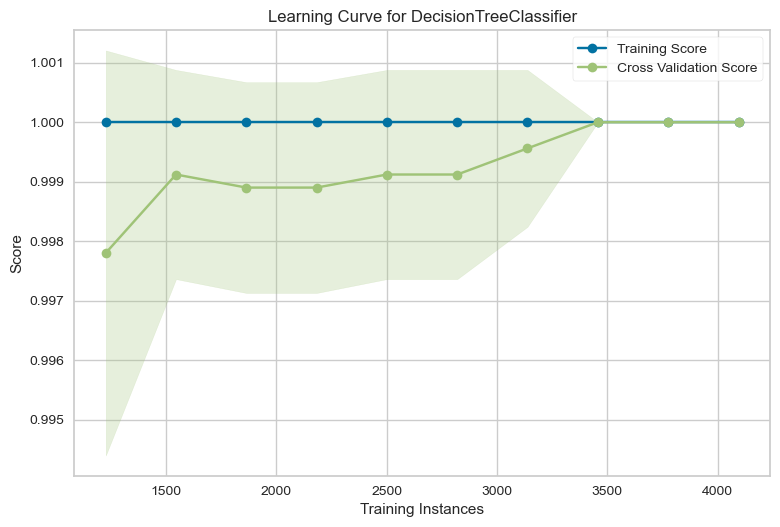

In [203]:
plot_model(dt, plot = 'learning')

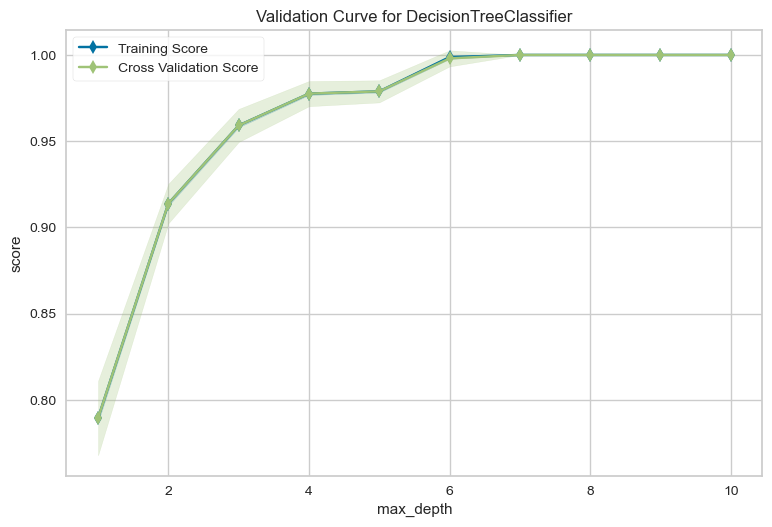

In [204]:
plot_model(dt, plot = 'vc')

# Feel free to criticize, please and thank you

_